In [1]:
#load all packages

# base packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import cv2

# tensorflow and keras
import tensorflow as tf


# sklearn
from sklearn.utils import shuffle
from sklearn.metrics import recall_score, precision_score, confusion_matrix, multilabel_confusion_matrix

# self-build procedures
from precision_recall_multiclass import precision_recall_multiclass
from load_oasis_set_win import load_oasis_set_win




### Load a Testset

In [2]:
# load validation dataset from drive
# set for training
tf.random.set_seed(10)
PATH = "F:\\MRI_class\\data\\Final Model\\Alzheimer_s Dataset\\test"
IMAGE_SIZE = (208,176)
test_ds = tf.keras.utils.image_dataset_from_directory(
                                        PATH, 
                                        seed=10, 
                                        shuffle=True, 
                                        image_size=IMAGE_SIZE, 
                                        batch_size=32
                                        )

# one hot encode the labels to fit into the cnn layers
test_fullTensor = test_ds.map(lambda x, y: (x, tf.one_hot(y, depth=3)))
#test_fullTensor = test_ds.map(lambda x, y: ((x - tf.math.reduce_mean(x)) / tf.math.reduce_std(x), tf.one_hot(y, depth=3)))

Found 1270 files belonging to 3 classes.


In [3]:
test_images = []
test_labels = []
for image,label in test_fullTensor.unbatch():
    
    test_images.append(image.numpy())
    test_labels.append(label.numpy())

test_images = np.array(test_images)
test_labels = np.array(test_labels)

### Check Images

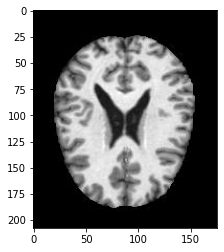

In [4]:
for image, label in test_fullTensor.unbatch().take(1):
    plt.imshow(image.numpy().astype("uint8"))
    

### Load a Model

In [5]:
model_path = "F:\\MRI_class\\data\\Final Model\\Alzheimer_s Dataset\\model\\h5\\model_1.h5"
model = tf.keras.models.load_model(model_path)


### Perform Prediction and Evaluate

In [6]:
y_pred = model.predict(test_images, batch_size=1)

1270/1270 [==============================] - 7s 4ms/step


In [7]:
model.evaluate(test_fullTensor)

40/40 [==============================] - 3s 52ms/step - loss: 0.0879 - precision: 0.9764 - recall: 0.9764 - auc: 0.9960


[0.08790203183889389,
 0.9763779640197754,
 0.9763779640197754,
 0.9960144758224487]

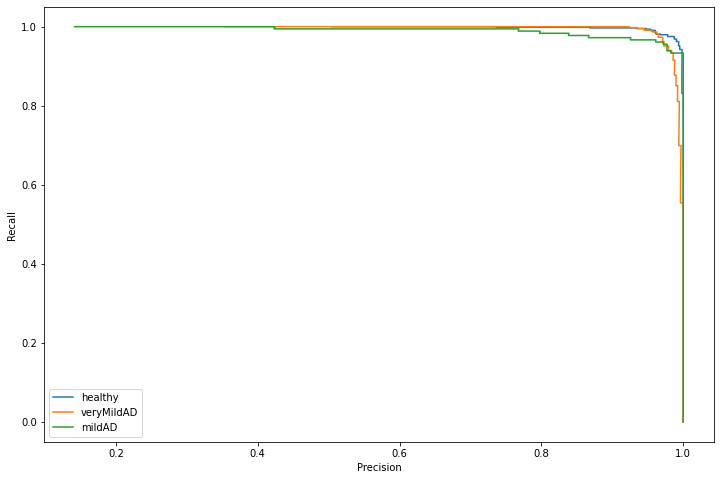

-----Recalls-----
healthy Recall: 0.9750390015600624
veryMildAD Recall: 0.9755011135857461
mildAD Recall: 0.9611111111111111
-------#####-------


-----Precisions-----
healthy Precision: 0.9811616954474097
veryMildAD Precision: 0.9647577092511013
mildAD Precision: 0.9664804469273743
-------#####-------


-----Accuracy-----
healthy Accuracy: 0.9811616954474097
veryMildAD Accuracy: 0.9647577092511013
mildAD Accuracy: 0.9664804469273743
-------#####-------


-----Macro/Micro Recall and Precisions-----
Macro recall: 0.9705504087523066 Micro recall: 0.9732283464566929
Macro precision: 0.9707999505419619 Micro precision: 0.9732283464566929
------------#####------------


In [8]:
precision_recall_multiclass(y_pred,test_labels,["healthy","veryMildAD","mildAD"])

In [9]:
y_pred_absolutes = []
for row in y_pred:
    if np.argmax(row) == 0:
        y_pred_absolutes.append([0])
    if np.argmax(row) == 1:
        y_pred_absolutes.append([1])
    if np.argmax(row) == 2:
        y_pred_absolutes.append([2])
y_pred_absolutes = np.array(y_pred_absolutes)

test_labels_absolutes = []
for row in test_labels:
    if np.argmax(row) == 0:
        test_labels_absolutes.append([0])
    if np.argmax(row) == 1:
        test_labels_absolutes.append([1])
    if np.argmax(row) == 2:
        test_labels_absolutes.append([2])
y_pred_absolutes = np.array(y_pred_absolutes)
test_labels_absolutes = np.array(test_labels_absolutes)

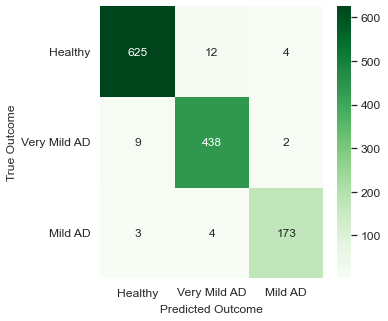

In [10]:
plt.figure(figsize=(5, 5),facecolor="w")
yticks = ["Healthy","Very Mild AD","Mild AD"]
xticks = ["Healthy","Very Mild AD","Mild AD"]
convmat = confusion_matrix(test_labels_absolutes,y_pred_absolutes)

sn.set(font_scale=1.1)
sn.heatmap(convmat, annot=True, annot_kws={"size": 12},fmt='d',xticklabels=xticks, yticklabels=yticks, cmap='Greens') # font size

plt.yticks(rotation=0)
plt.xlabel('Predicted Outcome', labelpad=6, fontsize=12)
plt.ylabel('True Outcome', fontsize=12)
plt.savefig('C:\\Users\\wolle\\Desktop\\images\\convMat.png',dpi=600, bbox_inches = "tight")
plt.show()


In [11]:
oasis_img_temp, oasis_label_temp = load_oasis_set_win()



Image Array Shape: (231, 208, 176, 3) 

Image Count: 231 

labels: [0. 1. 2. 3.] 

Class Counts:
      ID
CDR     
0.0  131
1.0   70
2.0   28
3.0    2


In [12]:
oasis_images = []
oasis_labels = []
for image,label in zip(oasis_img_temp,oasis_label_temp):
    if int(label) == 3:
        continue
    if int(label) == 0:
        #image = image/255
        oasis_images.append(cv2.flip(image,0))
        oasis_labels.append([1,0,0])
    if int(label) == 1:
        #image = image/255
        oasis_images.append(cv2.flip(image,0))
        oasis_labels.append([0,1,0])
    if int(label) == 2:
        #image = image/255
        oasis_images.append(cv2.flip(image,0))
        oasis_labels.append([0,0,1])

oasis_images = np.array(oasis_images)
oasis_labels = np.array(oasis_labels)

In [13]:
oasis_pred = model.predict(oasis_images, batch_size=1)

229/229 [==============================] - 1s 4ms/step


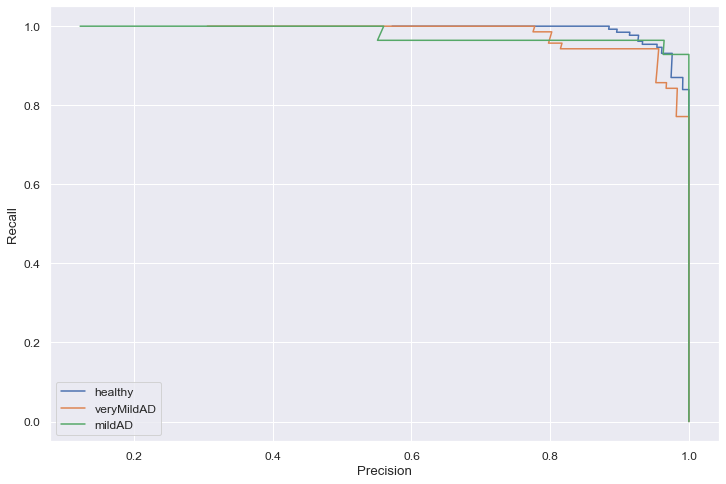

-----Recalls-----
healthy Recall: 0.8473282442748091
veryMildAD Recall: 0.9857142857142858
mildAD Recall: 0.9642857142857143
-------#####-------


-----Precisions-----
healthy Precision: 0.9910714285714286
veryMildAD Precision: 0.7840909090909091
mildAD Precision: 0.9310344827586207
-------#####-------


-----Accuracy-----
healthy Accuracy: 0.9910714285714286
veryMildAD Accuracy: 0.7840909090909091
mildAD Accuracy: 0.9310344827586207
-------#####-------


-----Macro/Micro Recall and Precisions-----
Macro recall: 0.932442748091603 Micro recall: 0.9039301310043668
Macro precision: 0.902065606806986 Micro precision: 0.9039301310043668
------------#####------------


In [14]:
precision_recall_multiclass(oasis_pred,oasis_labels,["healthy","veryMildAD","mildAD"])